In [ ]:
import numpy as np
import pickle
from os.path import join
import matplotlib.pyplot as plt


ImportError: attempted relative import with no known parent package

In [4]:
!ls

create_static_dataset.py  eigenlearning_wgl_allo.py   generate_dataset.py
dataset			  eigvec_learning	      old
dataset_test.py		  encoder.py		      __pycache__
eigenlearner		  experiments		      static_dataset
eigenlearner_FA		  experiments_test	      Untitled-1.ipynb
eigenlearning_fa.py	  experiments_test_old	      WGL_ALLO.py
eigenlearning_tabular.py  experiments_test_old_newer  WGL.py


In [5]:
data_path = join("experiments_test")

In [11]:
def get_filename(hypersetting, seed):
    lambd, step_size_start, step_size_end, batch_size, barrier = hypersetting
    run_name = f"{lambd}-{step_size_start}-{step_size_end}-{batch_size}-{barrier}-{seed}.pkl"

    return run_name


In [37]:
def load_data(env, obs_type, hypersetting):
    
    cosine_similarity = []

    for seed in range(1, 11):
        f = get_filename(hypersetting, seed)


        with open(join("experiments_test", env, obs_type, "data", f), "rb") as f:
            data = pickle.load(f)

        cs = data['cos_sims']
        # cs = np.array(cs)
        cosine_similarity.append(cs)

    return np.array(cosine_similarity)



In [25]:
hyper = [20.0, 0.0003, 0.0003, 250, 0.5]

cosine_similarity = load_data("fourrooms_2", "coordinates", hyper)

In [27]:
cosine_similarity.shape
# 10 seeds, #datapoints, 10 eigenvectors

(10, 3201, 10)

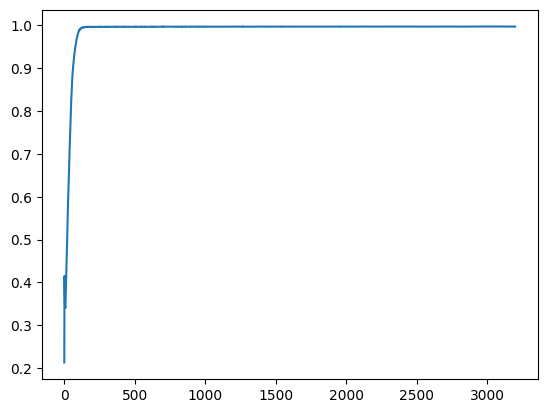

In [29]:
cs_pro = cosine_similarity.mean(-1).mean(0)

plt.plot(cs_pro)

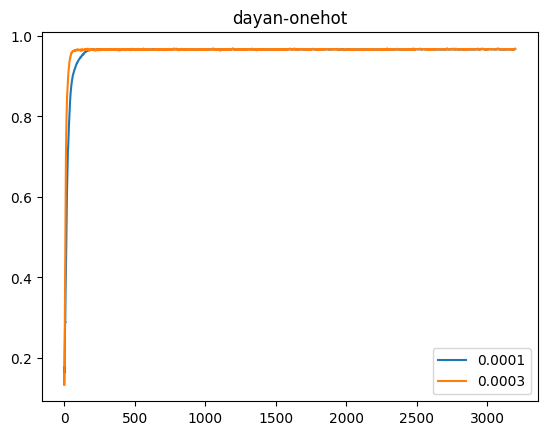

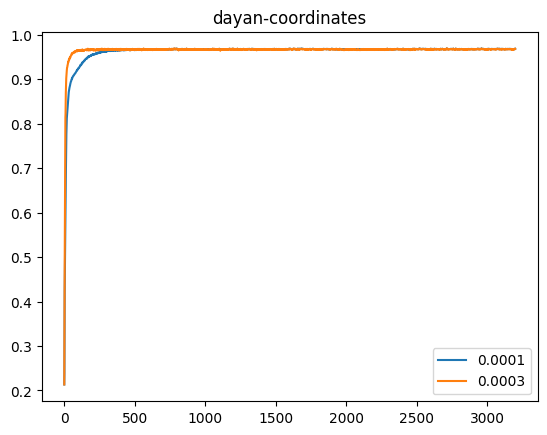

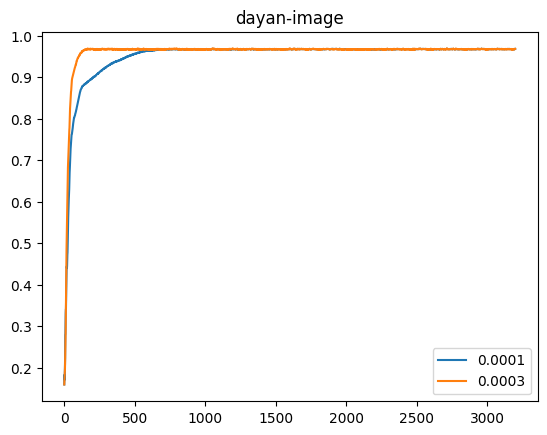

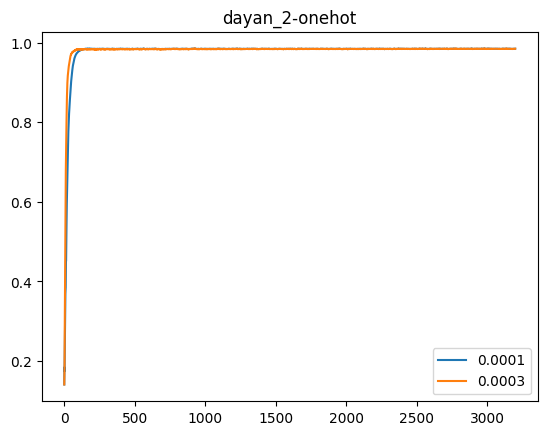

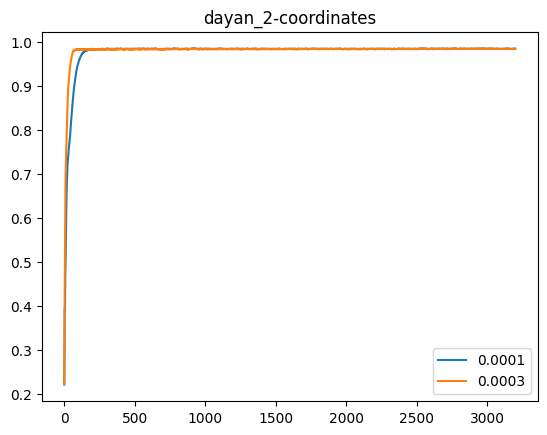

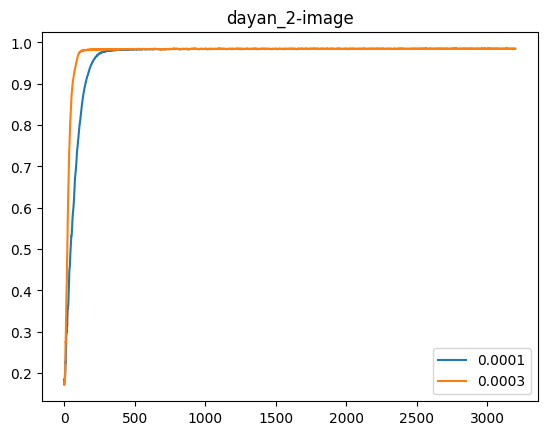

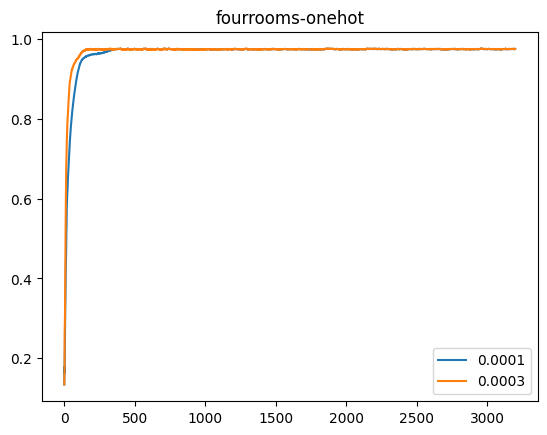

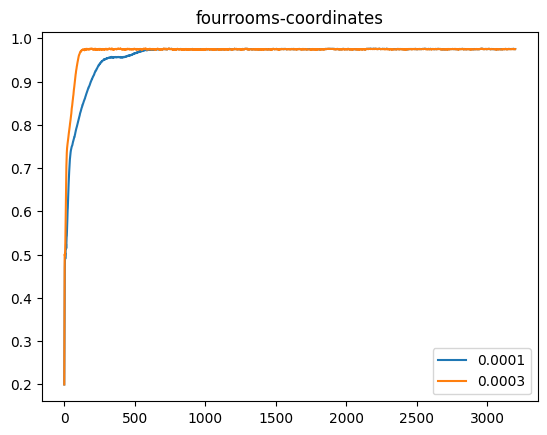

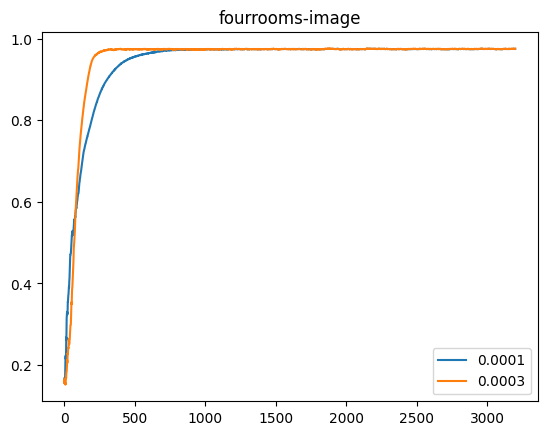

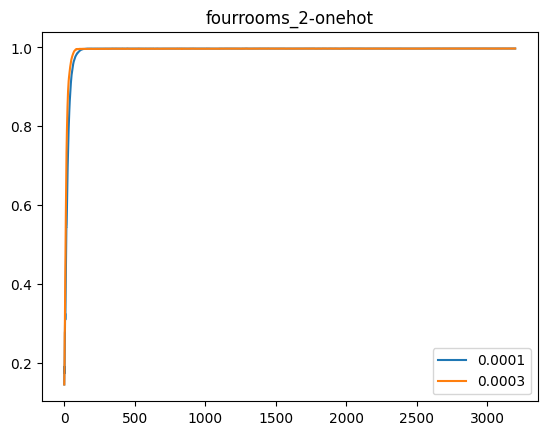

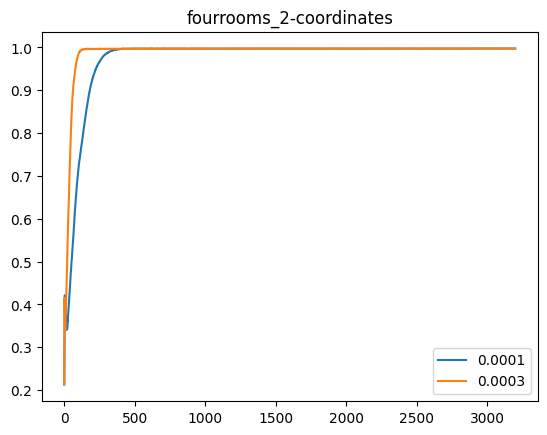

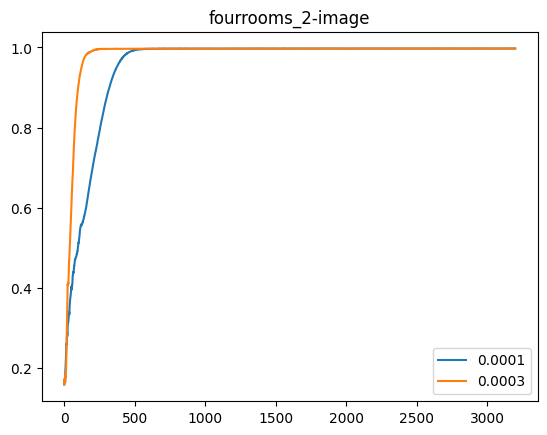

In [32]:
for env in ["dayan", "dayan_2", "fourrooms", "fourrooms_2",]:
    for obs_type in ["onehot", "coordinates", "image"]:
        for step_size in [0.0001, 0.0003]:
            hyper = [20.0, step_size, step_size, 250, 0.5]

            cos_sim = load_data(env, obs_type, hyper)

            cos_sim = cos_sim.mean(-1).mean(0)

            plt.plot(cos_sim, label=step_size)

        plt.legend()
        plt.title(f"{env}-{obs_type}")
        plt.show()


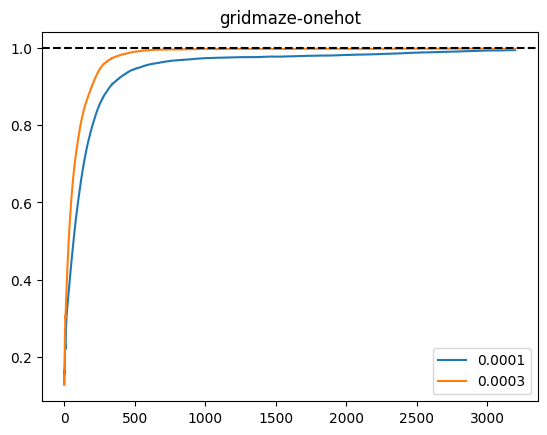

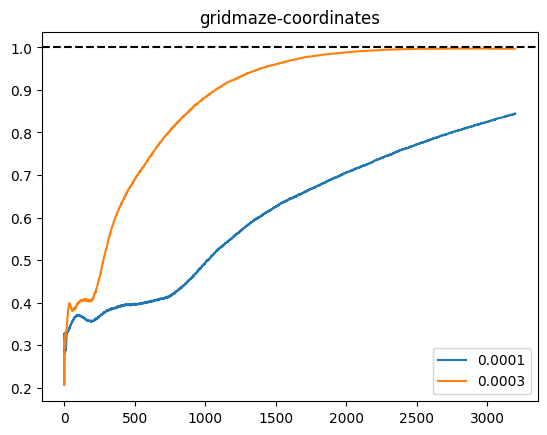

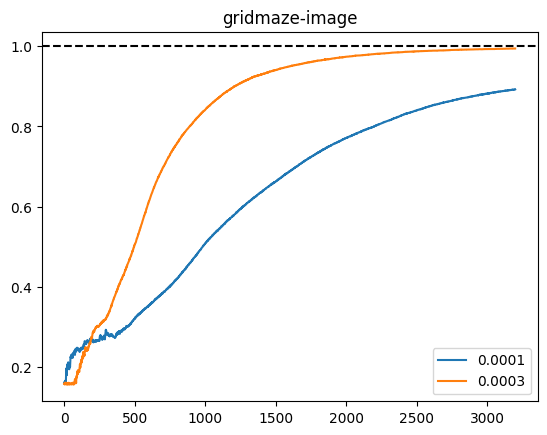

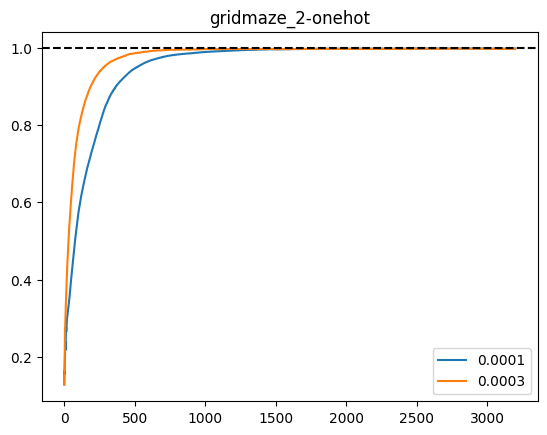

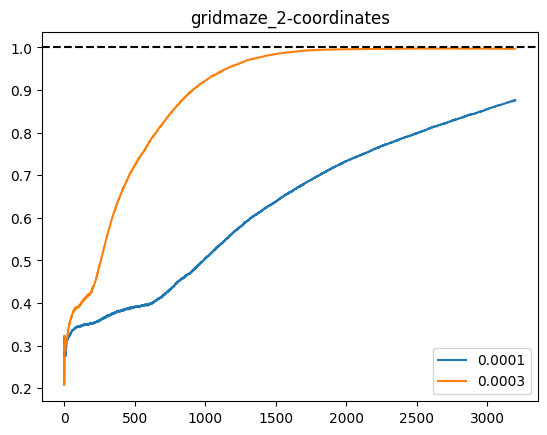

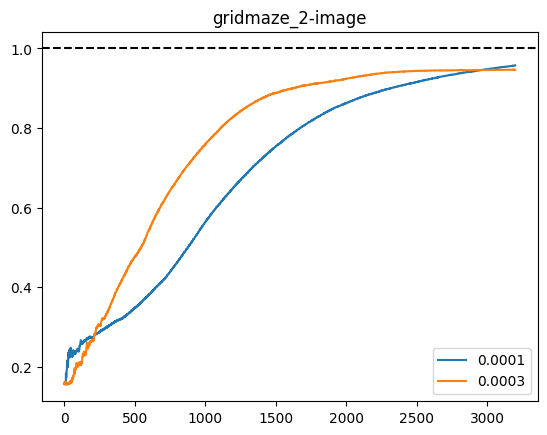

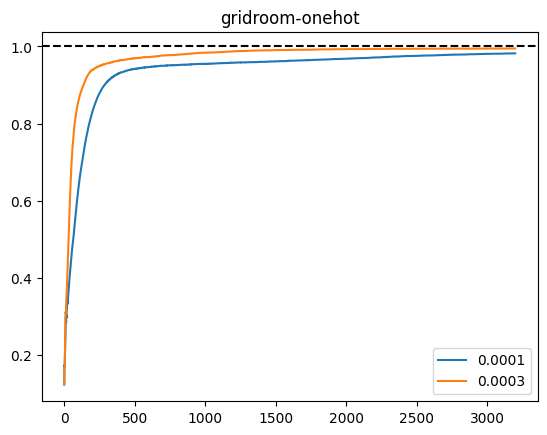

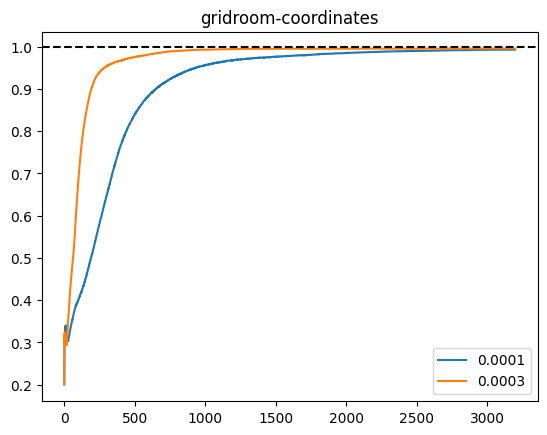

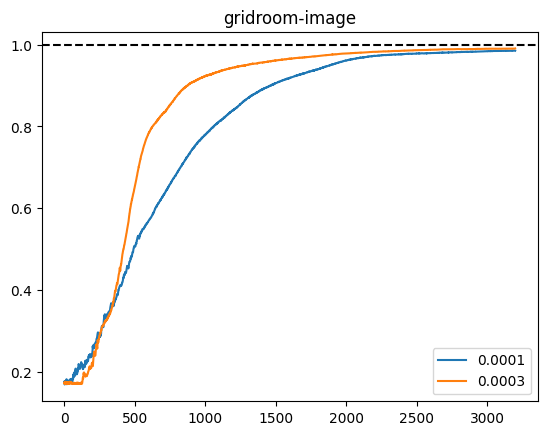

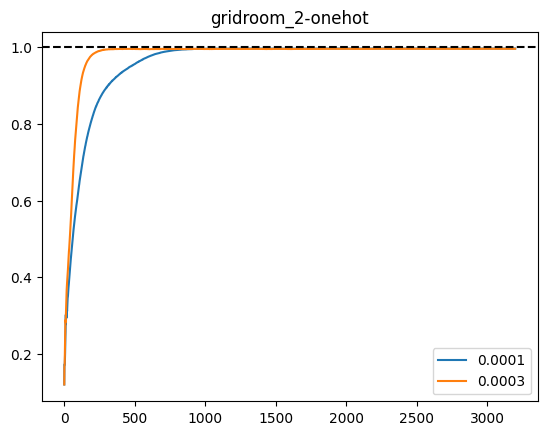

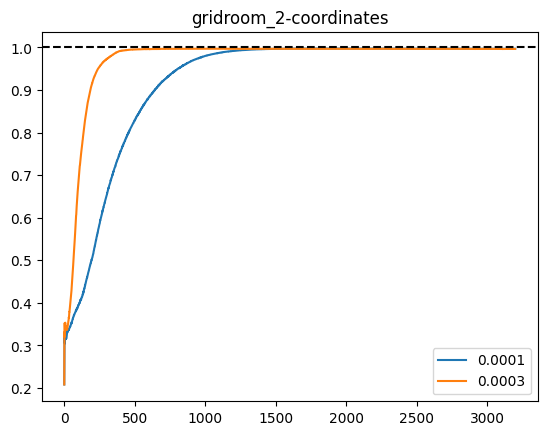

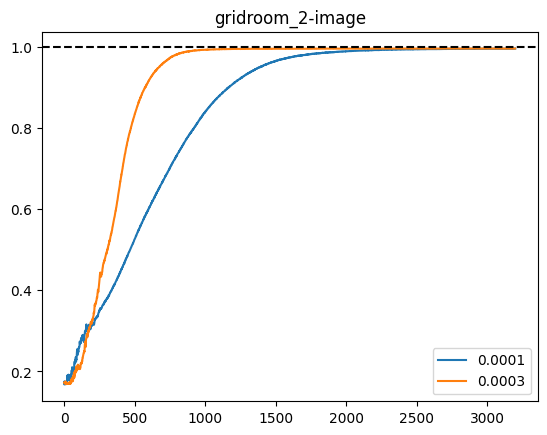

In [39]:
for env in ["gridmaze", "gridmaze_2", "gridroom", "gridroom_2"]:
    for obs_type in ["onehot", "coordinates", "image"]:
        for step_size in [0.0001, 0.0003]:
            hyper = [20.0, step_size, step_size, 500, 0.5]

            cos_sim = load_data(env, obs_type, hyper)

            cos_sim = cos_sim.mean(-1).mean(0)

            plt.plot(cos_sim, label=step_size)

        plt.axhline(1.0, color="k", linestyle="--")
        plt.legend()
        plt.title(f"{env}-{obs_type}")
        plt.show()